In [1]:
%load_ext watermark

In [15]:
%watermark -a "Derek Lewis" -m -v -p torch,torchvision

Author: Derek Lewis

Python implementation: CPython
Python version       : 3.11.3
IPython version      : 8.12.0

torch      : 2.0.1
torchvision: 0.15.2

Compiler    : Clang 14.0.6 
OS          : Darwin
Release     : 23.0.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit



In [16]:
import torch
import torchvision

In [17]:
LR = 0.001
DOWNLOAD = True
DATA = 'datasets/cifar10/'
device = 'mps'

In [18]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224, 224)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = torchvision.datasets.CIFAR10(
        root=DATA,
        train=True,
        transform=transform,
        download=DOWNLOAD
)

train_loader = torch.utils.data.DataLoader(
        dataset=train_dataset,
        batch_size=128,
        
)

62.7%IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

100.0%


Extracting datasets/cifar10/cifar-10-python.tar.gz to datasets/cifar10/


In [19]:
model = torchvision.models.resnet50()
model.to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = LR, momentum=0.9)

In [20]:
%%time

loss_plot = []

for batch_idx, (data, target) in enumerate(train_loader):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
    loss_plot.append(loss.item())
    print('batch_idx: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        batch_idx, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))

batch_idx: 0 [0/50000 (0%)]	Loss: 6.893815
batch_idx: 1 [128/50000 (0%)]	Loss: 6.749672
batch_idx: 2 [256/50000 (1%)]	Loss: 6.472919
batch_idx: 3 [384/50000 (1%)]	Loss: 6.066038
batch_idx: 4 [512/50000 (1%)]	Loss: 5.487506
batch_idx: 5 [640/50000 (1%)]	Loss: 5.015720
batch_idx: 6 [768/50000 (2%)]	Loss: 4.303550
batch_idx: 7 [896/50000 (2%)]	Loss: 3.843911
batch_idx: 8 [1024/50000 (2%)]	Loss: 3.120880
batch_idx: 9 [1152/50000 (2%)]	Loss: 2.779723
batch_idx: 10 [1280/50000 (3%)]	Loss: 2.626087
batch_idx: 11 [1408/50000 (3%)]	Loss: 2.577367
batch_idx: 12 [1536/50000 (3%)]	Loss: 2.606773
batch_idx: 13 [1664/50000 (3%)]	Loss: 2.456188
batch_idx: 14 [1792/50000 (4%)]	Loss: 2.247281
batch_idx: 15 [1920/50000 (4%)]	Loss: 2.422711
batch_idx: 16 [2048/50000 (4%)]	Loss: 2.372537
batch_idx: 17 [2176/50000 (4%)]	Loss: 2.480756
batch_idx: 18 [2304/50000 (5%)]	Loss: 2.383750
batch_idx: 19 [2432/50000 (5%)]	Loss: 2.376408
batch_idx: 20 [2560/50000 (5%)]	Loss: 2.333549
batch_idx: 21 [2688/50000 (5%)]	L

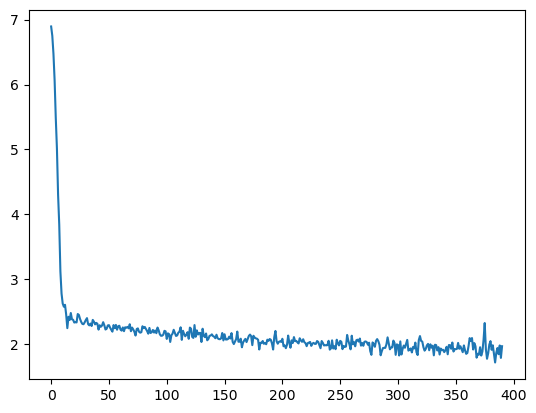

In [21]:
import matplotlib.pyplot as plt

X = range(len(loss_plot))
Y = loss_plot
plt.plot(X, Y)
plt.show()

In [8]:
torch.save({
     'model_state_dict': model.state_dict(),
     'optimizer_state_dict': optimizer.state_dict(),
     }, 'checkpoint.pth')

In [22]:
%%time

model.eval()

test_dataset = torchvision.datasets.CIFAR10(
        root=DATA,
        train=False,
        transform=transform,
        download=DOWNLOAD
)

test_loader = torch.utils.data.DataLoader(
        dataset=test_dataset,
        batch_size=128,
)

correct = 0
total = 0

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Files already downloaded and verified
Accuracy of the network on the 10000 test images: 29 %
CPU times: user 12.5 s, sys: 1min 7s, total: 1min 19s
Wall time: 3min 6s
